In [71]:
#-- Import module
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [72]:
# -- Working with dataset

from sklearn import datasets
#dir(datasets) -- Datasets is a folder inside we will have multiple dataset to work
from sklearn.datasets import load_digits
digit=load_digits()
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [73]:
digit.images.shape
#digit.target.shape

(1797, 8, 8)

In [74]:
digit.data.shape #digit-dataset , data- first key , shape gives R & C count 

(1797, 64)

In [75]:
data=pd.DataFrame(digit.data)

In [76]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [77]:
digit.images[0] #sclicing the first key value from imgae
digit.data.shape ,digit.target.shape ,digit.target_names.shape ,digit.images.shape

((1797, 64), (1797,), (10,), (1797, 8, 8))

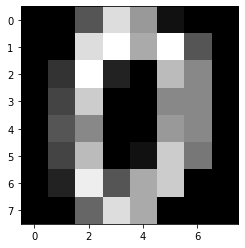

In [78]:
#sample images
plt.imshow(digit.images[0],cmap=plt.cm.gray) # Chnaging to Gray becuse mode can procees/understand information better for python

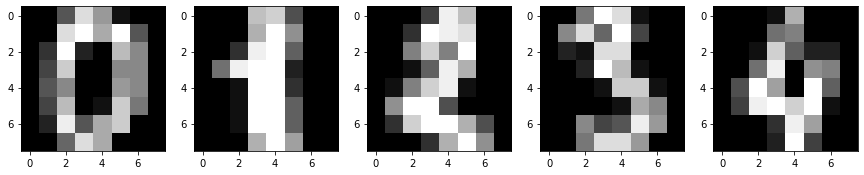

In [79]:
#- get info about enumerate and zip function

#index value will take the 1st index from the digits data-- 0 upto 4
#image value will take the 1st img from the data key value- 1-d array
#label value will take the 1st label from the target value

plt.figure(figsize=(15,4))
for index,(image,label) in enumerate (zip(digit.data[0:5],digit.target[0:5])):
    #print(index, (image, label))
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    #digit.data[0].shape # give 64 ,so converting into 2 dimension array we can split this into 8*8 matrix


In [80]:
x=digit.data #independent data-- all 64 features
y=digit.target #dependnet data-- all the  labels on the images

In [81]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [82]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [83]:
x.shape

(1797, 64)

In [84]:
y.shape

(1797,)

In [85]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [87]:
#Data Normalization/scaling 
from sklearn.preprocessing import StandardScaler
x_std1=StandardScaler()
x_std=x_std1.fit_transform(x)

In [ ]:
x.shape , x_std.shape

In [101]:
#Changing the Rows to coloumn for finding the Covariance matrix 
x1=x_std.T
x1.shape
pd.DataFrame(x1)

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


In [90]:
x1.shape

(64, 1797)

In [91]:
# Covariance matrix :- we will send the features to covariance matrix to create new set of features which will be linearly dependent of oringal values.
# for finding the eigen values and eigen vecs we have to transform original features to covraiance matrix.
cov_mat = np.cov(x1)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [94]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [95]:
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [96]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [98]:
#Explained variance - This will help you find how much data has been understood by your model
#in other words this will help you find how much % of data has individual eigen value , high value high dependency

tot=sum(eig_vals) # result :- 61.03396436525623
exp_var=[(i/tot)*100 for i in (eig_vals)]
#exp_var=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)] - Sorting data from high to low
exp_var

[12.03391609773492,
 9.56105440309786,
 8.444414892624536,
 6.498407907524184,
 4.8601548759663995,
 4.214119869271945,
 3.9420828035673696,
 3.3893809246383597,
 2.9982210116252483,
 2.9320025512522196,
 2.7818054635503233,
 2.5770550925819937,
 2.275303315764248,
 2.2271797395143507,
 2.165229431849245,
 1.9141666064421279,
 1.775547085168197,
 1.638069274284421,
 1.596460168862351,
 1.4891911870878172,
 1.3479695658179434,
 1.2719313702347579,
 1.1658373505919493,
 1.057646598536324,
 0.9753159471981101,
 0.9445589897319969,
 0.8630138269707207,
 0.8366428536685153,
 0.7976932484112406,
 0.7464713709260608,
 0.7255821513702747,
 0.691911245481182,
 0.6539085355726193,
 0.6407925738459858,
 0.5913841117223411,
 0.5711624052235243,
 0.523636803416638,
 0.08253509448180331,
 0.48180758644514254,
 0.45371925985845096,
 0.10369573015571894,
 0.42316275323277974,
 0.406053069979039,
 0.3970848082758284,
 0.125100742497302,
 0.13511841133708552,
 0.14776269410608803,
 0.16123606225673037,


In [99]:
#Cumulative explained Variance :- total sum of explained variance 
# get info about cumsum

cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  93.80175675,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

<function matplotlib.pyplot.show(close=None, block=None)>

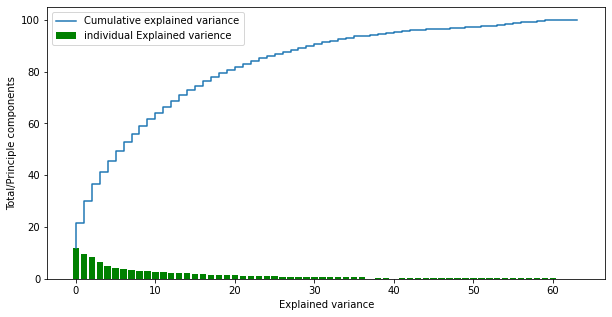

In [100]:
# Plot the Graph with Explained and Cumulative explained variance to find how much model got the information.
#By plotting graph we can reduce the features .

plt.figure(figsize=(10,5))
plt.bar(range(len(exp_var)),exp_var ,label='individual Explained varience',color='g')
plt.step(range(len(cum_exp_var)),cum_exp_var,label='Cumulative explained variance')
plt.xlabel('Explained variance')
plt.ylabel('Total/Principle components')
plt.legend()
plt.show

In [104]:
#Split the data into train test model.
x_train,x_test,y_train,y_test=train_test_split(x_std,y,train_size=0.8)

In [105]:
x_train

array([[ 0.        , -0.33501649, -0.88456568, ...,  1.39616473,
         3.40687545,  7.87022556],
       [ 0.        , -0.33501649, -0.25345218, ..., -0.29904339,
        -0.5056698 , -0.19600752],
       [ 0.        ,  1.87020193,  1.42951714, ..., -0.97712664,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649,  1.21914597, ...,  0.8876023 ,
         0.71700059, -0.19600752],
       [ 0.        , -0.33501649,  0.79840364, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.25345218, ...,  0.8876023 ,
         0.71700059, -0.19600752]])

In [106]:
x_test

array([[ 0.        , -0.33501649, -1.09493684, ...,  1.05712311,
        -0.26113572, -0.19600752],
       [ 0.        , -0.33501649,  0.79840364, ..., -0.63808502,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.88456568, ...,  0.20951905,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649,  1.42951714, ...,  0.03999823,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  0.37766131, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ..., -1.14664746,
        -0.5056698 , -0.19600752]])

In [109]:
x_train.shape,x_test.shape

((1437, 64), (360, 64))

In [110]:
#Working with PCA
pca=PCA(n_components=20) # by the graph we see Only 20 featues are useful out of 64 
pca_x_train=pca.fit_transform(x_train) # We are fitting the 20 features into X_train whose row = 1437 ,coloumn = 64
pca_x_test=pca.transform(x_test) # We are fitting the 20 features into X_train whose row = 360 ,coloumn = 64

In [111]:
pca_x_train.shape , pca_x_test.shape # we can see same rows with 20 number of features

((1437, 20), (360, 20))

In [116]:
#PCA part is completed 
#Now using Decision Tree we are going to predict the data and check the accuracy_score , confusion_matrix

y_train.shape

(1437,)

In [132]:
#Decision tree classification
dt=DecisionTreeClassifier()
dt1=dt.fit(pca_x_train,y_train)
predicted=dt1.predict(pca_x_test)
predicted

array([0, 0, 8, 4, 9, 0, 7, 4, 7, 7, 1, 5, 8, 4, 4, 4, 3, 7, 5, 5, 7, 2,
       6, 6, 5, 1, 4, 9, 1, 8, 7, 6, 4, 4, 0, 0, 3, 7, 5, 9, 2, 2, 8, 8,
       5, 5, 7, 5, 0, 9, 4, 9, 6, 2, 8, 6, 3, 8, 8, 8, 7, 2, 0, 4, 8, 6,
       7, 7, 7, 6, 5, 9, 3, 6, 9, 8, 7, 5, 3, 9, 1, 5, 4, 2, 5, 1, 6, 1,
       0, 3, 9, 8, 5, 4, 6, 9, 7, 8, 8, 2, 6, 5, 6, 9, 2, 5, 9, 3, 5, 2,
       3, 7, 1, 6, 0, 0, 6, 8, 0, 8, 2, 2, 5, 5, 7, 4, 8, 7, 1, 6, 7, 5,
       3, 7, 1, 3, 9, 1, 9, 6, 7, 1, 7, 5, 1, 1, 0, 4, 7, 5, 5, 2, 2, 5,
       6, 6, 3, 2, 3, 1, 2, 1, 2, 5, 5, 0, 1, 9, 9, 2, 9, 3, 9, 3, 1, 3,
       6, 3, 2, 0, 5, 7, 0, 6, 1, 5, 1, 8, 3, 1, 1, 0, 7, 3, 6, 5, 3, 3,
       3, 2, 4, 5, 8, 9, 6, 6, 7, 8, 8, 4, 4, 5, 4, 3, 5, 4, 1, 1, 9, 4,
       6, 0, 4, 5, 0, 0, 8, 0, 2, 4, 0, 7, 4, 9, 0, 8, 2, 4, 2, 0, 8, 9,
       6, 2, 0, 8, 8, 2, 7, 5, 4, 9, 1, 1, 6, 0, 8, 8, 6, 6, 3, 8, 8, 1,
       6, 5, 1, 1, 7, 0, 8, 6, 2, 9, 8, 4, 7, 1, 8, 0, 1, 0, 4, 4, 4, 7,
       0, 1, 5, 4, 7, 4, 2, 4, 4, 0, 3, 0, 2, 3, 8,

In [127]:
predicted

(360,)

In [133]:
accuracy_score(predicted,y_test)

0.8083333333333333

In [124]:
confusion_matrix(predicted, y_test)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  2,  1,  0,  1,  0,  0,  3,  2],
       [ 1,  1, 27,  2,  1,  1,  0,  0,  1,  0],
       [ 0,  0,  1, 18,  0,  3,  0,  4,  4,  2],
       [ 2,  0,  1,  0, 31,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  1,  2],
       [ 3,  2,  1,  0,  0,  1, 28,  0,  1,  0],
       [ 0,  0,  0,  1,  2,  0,  0, 32,  0,  2],
       [ 3,  2,  3,  1,  0,  0,  0,  0, 30,  4],
       [ 3,  0,  0,  2,  0,  1,  0,  1,  1, 26]], dtype=int64)

In [ ]:

'''
      Predictions
       
Actual   0    1   2   3   4   5   6   7   8   9     
      0 [26,  0,  0,  0,  0,  1,  1,  0,  0,  1],
      1 [ 1, 34,  0,  0,  0,  0,  0,  0,  3,  1],
      2 [ 0,  0, 31,  0,  0,  1,  0,  1,  2,  1],
      3 [ 0,  0,  0, 24,  0,  1,  0,  0,  4,  4],
      4 [ 0,  0,  1,  0, 28,  0,  1,  0,  1,  1],
      5 [ 1,  0,  0,  1,  1, 31,  0,  1,  2,  2],
      6 [ 1,  0,  0,  0,  0,  0, 34,  1,  0,  0],
      7 [ 0,  0,  1,  0,  2,  0,  0, 35,  0,  0],
      8 [ 0,  0,  2,  1,  0,  2,  1,  0, 29,  3],
      9 [ 1,  1,  1,  0,  1,  2,  0,  1,  2, 31]]
'''

In [134]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]#help us out to get the misclassified index value
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [135]:
misclassification=get_misclassified_index(predicted,y_test)


In [136]:
len(misclassification) # misclassification contains all the Index values whose values are wrongly classified

69

In [137]:
misclassification[:5]

[8, 11, 17, 18, 19]

In [138]:
def plot_misclassifications(misclassifications):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,4)),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(predicted[wrong],y_test[wrong]))

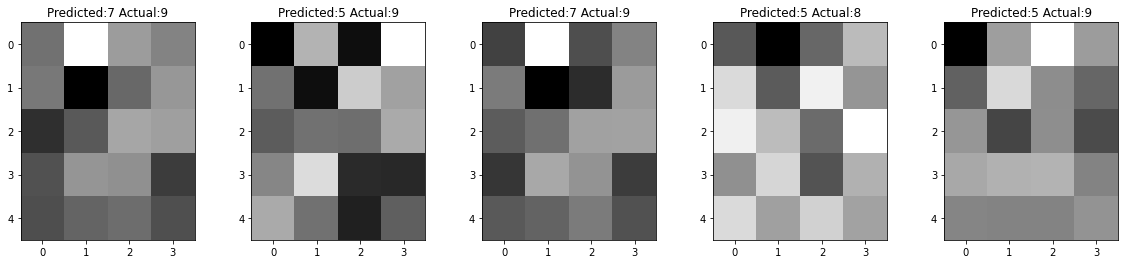

In [139]:
plot_misclassifications(misclassification)

In [ ]:
# Enumerate - this function accepts 2 arguments  returns index and value for that index
eg=[1,3,4,2,5,0,9,6,8]
for i,j in enumerate (eg):
    print(i,j)

In [ ]:
#zip - this function helps us to extract values from diffrent datasets and appends to tuple  or list format
# however the appdend values will be in tuple format.
a=[1,2,3,4,5,6,7,8]
b=['A','B','C','D','E','F','G','H']
k=zip(a,b)

In [ ]:
list(k) # We can change the output of Zip like how we want tuple(k) gives tuple ,list(k) give list output

In [ ]:
#Enumerate & ZIP

eg1=[1,3,4,2,5,0,9,6,8]
eg2=['A','B','C','D','E','F','G','H']
for index,(i1,i2) in enumerate (zip(eg1,eg2)):
    print (index,i1,i2)

In [102]:
# cumulative explaied variance
i=[1,2,3,4,5,6,7,8,9]
j=np.cumsum(i)
j

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)